# Explainability: SHAP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# To run locally or on colab
colab = True
base_path = '../'

if colab:
    base_path = '/content/drive/MyDrive/ NLP - final project/'

Mounted at /content/drive


Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Generating explanations...


  0%|          | 0/110 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [01:08, 34.45s/it]


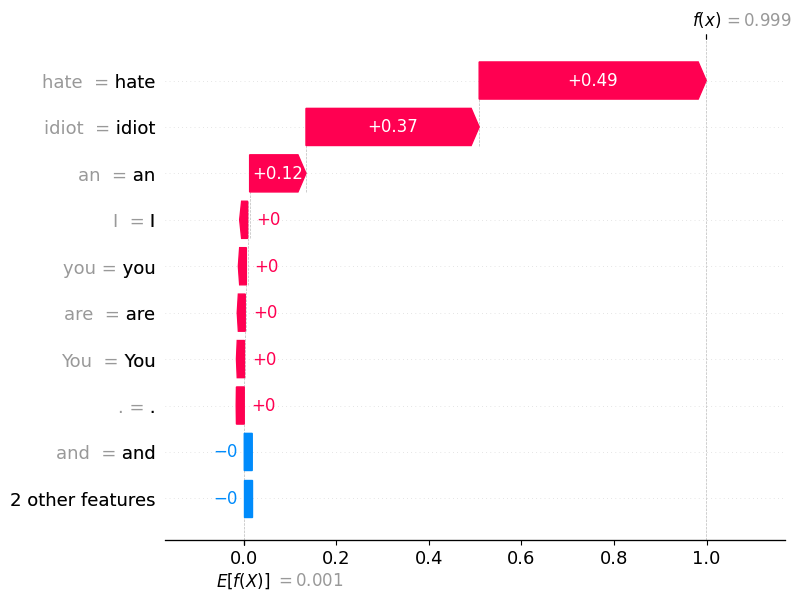

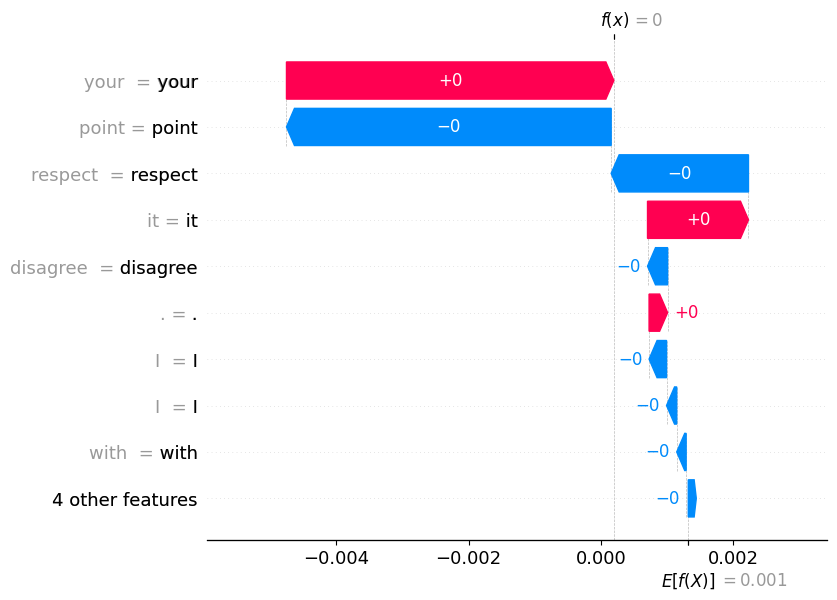

In [2]:
import shap
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# CONFIGURATION
MODEL_PATH = f"{base_path}models"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. LOAD MODEL & PIPELINE
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(device)
p = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

# 2. DEFINE EXPLAINER
explainer = shap.Explainer(p)

# 3. SELECT SAMPLES TO EXPLAIN
samples = [
    "You are an idiot and I hate you.",              # Clear Toxic
    "I disagree with your point, but I respect it."  # Non-Toxic
]

print("Generating explanations...")
shap_values = explainer(samples)

# 4. VISUALIZE
# shap.plots.text(shap_values[:, :, 1])
# shap.plots.bar(shap_values[0, :, 1])
shap.plots.waterfall(shap_values[0, :, 1])
shap.plots.waterfall(shap_values[1, :, 1])